## Decision Tree Classifier

[Decision Tree Classifier](https://scikit-learn.org/stable/modules/tree.html#classification)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from math import log2
from sklearn import tree 
import graphviz

## Load and split data

In [2]:
df = pd.read_csv('melb_tree_train.csv')
df_x = df.drop(columns = 'Type')
s_y = df['Type']
df

,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea
0,2,t,771000.0,13.8,2.0,1.0,1.0,0.0,99.0,1992.0,Bayside
1,3,t,700000.0,7.9,3.0,2.0,1.0,189.0,110.0,1990.0,Banyule
2,3,u,975000.0,12.1,3.0,2.0,1.0,277.0,109.0,1975.0,Glen Eira
3,3,h,1290000.0,8.0,3.0,1.0,1.0,618.0,132.0,1960.0,Moonee Valley
4,2,u,500000.0,4.2,2.0,1.0,1.0,0.0,86.0,2000.0,Melbourne
...,...,...,...,...,...,...,...,...,...,...,...
805,2,t,855000.0,11.4,2.0,1.0,1.0,158.0,106.0,1994.0,Glen Eira
806,2,u,696000.0,2.6,2.0,2.0,1.0,0.0,68.0,2008.0,Yarra
807,2,t,520000.0,9.9,2.0,1.0,1.0,0.0,82.0,2011.0,Moreland
808,3,t,815000.0,4.3,3.0,2.0,2.0,198.0,130.0,1990.0,Maribyrnong


## Entropy function

In [3]:
def calc_entropy(s_y):
    entropy = 0
    for p in s_y.value_counts(normalize = True):
        entropy -= p * log2(p)
    return entropy

## Calculating entropy of full data set and partitions

  - Partitions:
    * Landsize $\in$ [0,200]
    * Landsize $\in$ (200,450]
    * Landsize $\in$ (450, $\infty$)

In [4]:
# The entire data set
calc_entropy(s_y)

1.582533311426178

In [5]:
# Less than or equal to 200
calc_entropy(s_y[df['Landsize'] <= 200])

1.3456432116206725

In [6]:
# Between 200 and 450
calc_entropy(s_y[(df['Landsize'] > 200) & (df['Landsize'] <= 450)])

1.4660501816027975

In [7]:
# greater than 450
calc_entropy(s_y[df['Landsize'] > 450])

1.09954792005911

## Gini Index function

In [8]:
def calc_gini(s_y):
    num = 0
    for p in s_y.value_counts(normalize = True):
        num += p ** 2
    return 1 - num

## Calulating Gini of full data set and partitions
  - Partitions: 
    * Landsize $\in$ [0,200]
    * Landsize $\in$ (200,450]
    * Landsize $\in$ (450, $\infty$)

In [9]:
# Entire data set
calc_gini(s_y)

0.6655601280292638

In [10]:
# Less than or equal to 200
calc_gini(s_y[df['Landsize'] <= 200])

0.5741211482422965

In [11]:
# Between 200 and 450
calc_gini(s_y[(df['Landsize'] > 200) & (df['Landsize'] <= 450)])

0.6101021682602731

In [12]:
# greater than 450
calc_gini(s_y[df['Landsize'] > 450])

0.43819341715976323

## Create a decision tree 
Using: \
[Decision Tree](https://scikit-learn.org/stable/modules/tree.html#tree)

In [13]:
# df = pd.read_csv('melb_tree_train.csv')
# df_x = df.drop('Type', axis = 1)
# s_y = df['Type']
# ##################
# Create Tree
# one-hot encoding
# council area
council_dummy = pd.get_dummies(df_x['CouncilArea'])
df_x = df_x.drop('CouncilArea', axis = 1)
df_x = df_x.join(council_dummy)

s_y, index = s_y.factorize()

clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
clf.fit(df_x, s_y)
index

Index(['t', 'u', 'h'], dtype='object')

In [14]:
# Displaying text version
r = tree.export_text(clf, feature_names = list(df_x.columns))
print(r)

|--- YearBuilt <= 1977.50
|   |--- Rooms <= 2.50
|   |   |--- Price <= 915000.00
|   |   |   |--- class: 1
|   |   |--- Price >  915000.00
|   |   |   |--- class: 2
|   |--- Rooms >  2.50
|   |   |--- Landsize <= 429.00
|   |   |   |--- class: 2
|   |   |--- Landsize >  429.00
|   |   |   |--- class: 2
|--- YearBuilt >  1977.50
|   |--- BuildingArea <= 104.31
|   |   |--- Landsize <= 76.00
|   |   |   |--- class: 1
|   |   |--- Landsize >  76.00
|   |   |   |--- class: 0
|   |--- BuildingArea >  104.31
|   |   |--- Landsize <= 391.00
|   |   |   |--- class: 0
|   |   |--- Landsize >  391.00
|   |   |   |--- class: 2



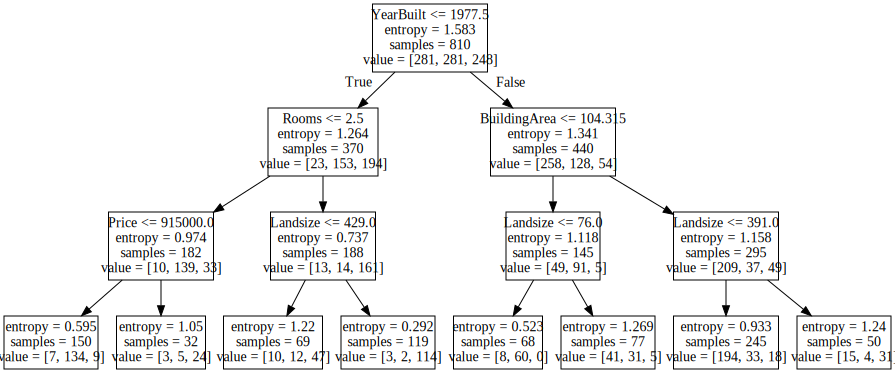

In [15]:
# Displaying graphviz version
data = tree.export_graphviz(clf, out_file=None, feature_names = list(df_x.columns))
graph = graphviz.Source(data)
graph

## Calculate the Accuracy and Display Learning Curve (error rates)
Hyperparameter range:

    - Varying the max depth from 2 to 15 with Gini Index as the impurity measure
    - Varying the max depth from 2 to 15 with Entropy as the impurity measure


In [16]:
# Load in the test data
test_df = pd.read_csv('melb_tree_test.csv')
test_x = test_df.drop(columns = 'Type')
test_y = test_df['Type']

council_dummy = pd.get_dummies(test_x['CouncilArea'])
test_x = test_x.drop('CouncilArea', axis = 1)
test_x = test_x.join(council_dummy)

test_y, test_index = test_y.factorize()

test_index

Index(['t', 'h', 'u'], dtype='object')

In [17]:
# Build the trees using the training data
depth_ls = np.arange(2, 16)

gini_test_ers = []
gini_train_ers = []

ent_test_ers = []
ent_train_ers = []

# Gini
for d in depth_ls:
    
    # Create tree using train data
    clf = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = d)
    clf.fit(df_x, s_y)
    
    # Calc train error rate
    num_wrong = 0
    predictions = clf.predict(df_x)
    # for each prediction, check if it is correct
    for i in range(len(predictions)):
        if predictions[i] != s_y[i]:
            num_wrong += 1
    gini_train_ers.append(num_wrong / len(s_y))
    
    # Calc test error rate
    num_wrong = 0
    test_predictions = clf.predict(test_x)
    # for each prediction, check if it is correct
    for i in range(len(test_predictions)):
        if index[test_predictions[i]] != test_index[test_y[i]]:
            num_wrong += 1
    gini_test_ers.append(num_wrong / len(test_y))

    
# Entropy
for d in depth_ls:
    # Create tree
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = d)
    clf.fit(df_x, s_y)
    
    # Calc train error rate
    num_wrong = 0
    predictions = clf.predict(df_x)
    # for each prediction, check if it is correct
    for i in range(len(predictions)):
        if predictions[i] != s_y[i]:
            num_wrong += 1
    ent_train_ers.append(num_wrong / len(s_y))
    
    # Calc test error rate
    num_wrong = 0
    test_predictions = clf.predict(test_x)
    # for each prediction, check if it is correct
    for i in range(len(test_predictions)):
        if index[test_predictions[i]] != test_index[test_y[i]]:
            num_wrong += 1
            
    ent_test_ers.append(num_wrong / len(test_y))

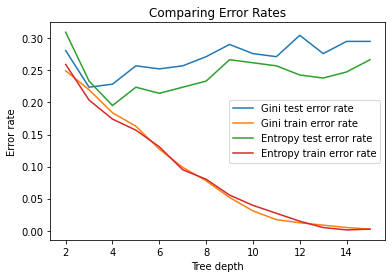

In [18]:
# Plot the 4 learning curves
plt.plot(depth_ls, gini_test_ers, label = 'Gini test error rate')
plt.plot(depth_ls, gini_train_ers, label = 'Gini train error rate')
plt.plot(depth_ls, ent_test_ers, label = 'Entropy test error rate')
plt.plot(depth_ls, ent_train_ers, label = 'Entropy train error rate')
plt.title('Comparing Error Rates')
plt.xlabel('Tree depth')
plt.ylabel('Error rate')
plt.legend()